In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [7]:
digits.target.shape

(1797,)

In [9]:
digits.data.shape

(1797, 64)

In [11]:
digits.images.shape

(1797, 8, 8)

0


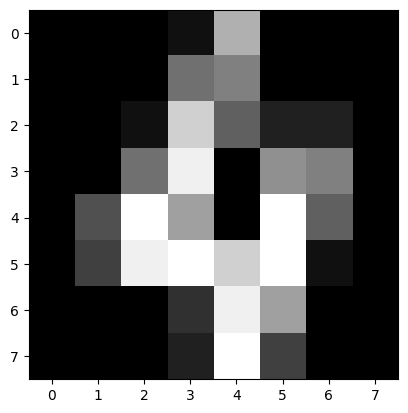

In [17]:
import matplotlib.pyplot as plt

x = digits.images[4]
print(digits.target[0])
plt.gray()
plt.imshow(x)
plt.show()

# preprocess

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [20]:
x_train[0]

array([ 0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  1., 14., 11.,
        0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  2.,  3.,  0.,  0.,  7.,
       16.,  4.,  1., 15., 10.,  0.,  0., 10., 14.,  0.,  7., 16.,  8.,
        0.,  0., 15., 16., 16., 16., 16.,  1.,  0.,  0.,  4., 11., 11.,
       15., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.])

# Normalize

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
x_train[0]

array([0.        , 0.        , 0.        , 0.1875    , 0.8125    ,
       0.4375    , 0.        , 0.        , 0.        , 0.        ,
       0.0625    , 0.875     , 0.6875    , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.75      , 0.75      ,
       0.0625    , 0.125     , 0.1875    , 0.        , 0.        ,
       0.46666667, 1.        , 0.25      , 0.0625    , 0.9375    ,
       0.66666667, 0.        , 0.        , 0.71428571, 0.875     ,
       0.        , 0.4375    , 1.        , 0.57142857, 0.        ,
       0.        , 0.9375    , 1.        , 1.        , 1.        ,
       1.        , 0.0625    , 0.        , 0.        , 0.25      ,
       0.6875    , 0.6875    , 0.9375    , 0.6875    , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.125     ,
       0.9375    , 0.25      , 0.        , 0.        ])

# performance metrics

In [37]:
# calculate and show confusion matrix - accuracy - precision - recall 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)    
    p = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    r = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    c = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    
    
    
    print(f"acc train: {acc_train} - acc test: {acc_test} - precesion: {p} - recall: {r} - confusion matrix: {c}")
    return acc_train, acc_test, p, r, c

# classification

# 1. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=128, n_estimators=256)
rf.fit(x_train, y_train)

,n_estimators,256
,criterion,'gini'
,max_depth,128
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
acc_train_rf, acc_test_rf, p_rf, r_rf, c_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train: 1.0 - acc test: 0.9666666666666667 - precesion: 0.9687542174776872 - recall: 0.9666666666666667 - confusion matrix: [[24  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  1  1]
 [ 0  0  0  0 31  0  0  1  0  1]
 [ 0  0  0  0  0 38  0  0  2  1]
 [ 1  0  0  0  0  1 39  0  0  0]
 [ 0  0  0  0  1  0  0 45  0  1]
 [ 0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


# 2. SVM

In [42]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [43]:
# predict labels and show calculate metrics
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm, c_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9777777777777777 - precesion: 0.9788872602572293 - recall: 0.9777777777777777 - confusion matrix: [[24  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 38  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  2]
 [ 0  0  0  0  1  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  2]
 [ 0  1  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


# 3. ANN

In [48]:
# artificial neural networks
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=64, learning_rate='adaptive')
ann.fit(x_train, y_train)

,hidden_layer_sizes,512
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,64
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [49]:
# predict labels and show calculate metrics
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann, c_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9638888888888889 - precesion: 0.9661737914384974 - recall: 0.9638888888888889 - confusion matrix: [[24  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  2  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  1  0  0  0 38  0  0  0  2]
 [ 1  0  0  0  1  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  1]
 [ 0  2  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


# 4. KNN

In [55]:
# knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
# predict labels and show calculate metrics
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn, c_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.988169798190675 - acc test: 0.9805555555555555 - precesion: 0.9807799786581297 - recall: 0.9805555555555555 - confusion matrix: [[24  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  1  0  0]
 [ 0  0  1 37  0  0  0  1  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0  1]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 0  1  0  0  0  0  0  0 27  0]
 [ 0  0  0  2  0  0  0  0  0 33]]


# Comparision

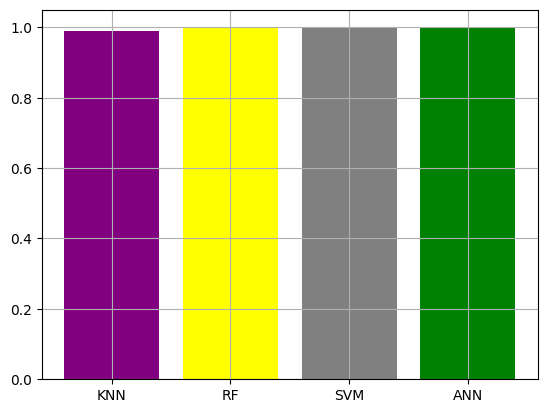

In [58]:
# show the accuracy of trained datas' results on bar chart
import matplotlib.pyplot as plt
acc_train = [acc_train_knn, acc_train_rf, acc_train_svm, acc_train_ann]
title = [ "KNN", "RF", "SVM", "ANN"]
colors = ['purple', 'yellow', 'gray', 'green']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

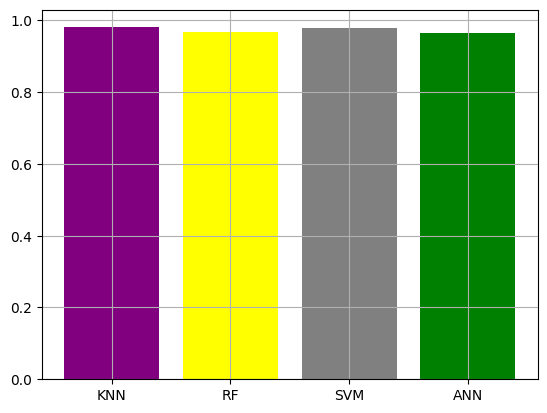

In [59]:
# show the accuracy of tested datas' results on bar chart
acc_test = [acc_test_knn, acc_test_rf, acc_test_svm, acc_test_ann]
title = ["KNN", "RF", "SVM", "ANN"]
colors = ['purple', 'yellow', 'gray', 'green']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

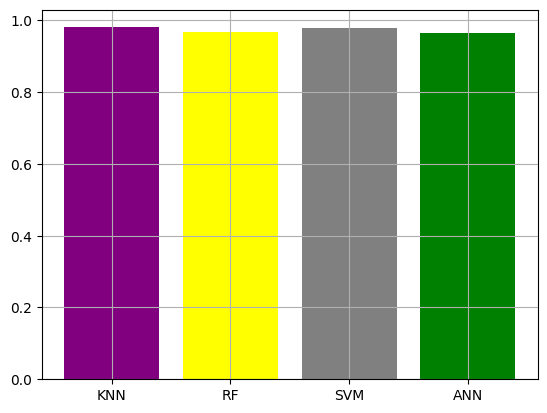

In [61]:
# show the precision of datas' results on bar chart
p = [p_knn, p_rf, p_svm, p_ann]
title = ["KNN", "RF", "SVM", "ANN"]
colors = ['purple', 'yellow', 'gray', 'green']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

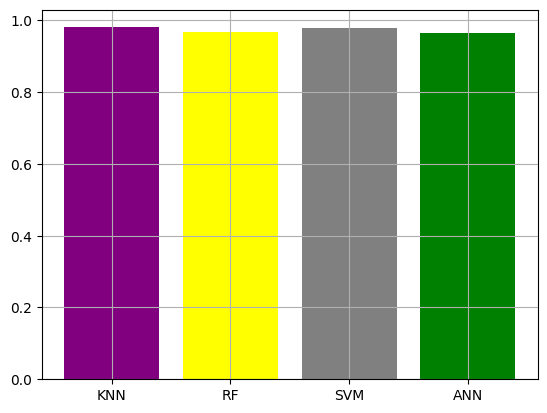

In [62]:
# show the recall of datas' results on bar chart

r = [r_knn, r_rf, r_svm, r_ann]
title = ["KNN", "RF", "SVM", "ANN"]
colors = ['purple', 'yellow', 'gray', 'green']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()